## 3251 TERM PROJECT -  PREDICTING MEDICAL EXPENSES USING MULTIPLE REGRESSION

<ul> Columns

<li> age: Age of person
<li> sex: Gender, female vs male
<li> bmi: Body Mass Index, body fat based on height and weight kg/m^2 
<li> children: Number of children/dependents covered by health insurance
<li> smoker: Smoking activity yes vs no
<li> region: Residential area of the person in the US, (Northeast, Southeast, Southwest, Northwest)
<li> charges: Medical expenses

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import scipy, scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
pd.options.display.max_rows = 10

### Data Loading

In [2]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The beneficiaries' ages range from 18 years to 64 years. 
The average, medical cost is USD 13,270 with a median value of USD 9382.

In [5]:
#check if there is null data
df.isnull().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

### Data Preparing

In [6]:
#ONEHOTENCODING
#female =0 male=1
lb_sex = LabelEncoder()
df["sex"]=lb_sex.fit_transform(df["sex"])
sex_OHE=OneHotEncoder(categorical_features=[1])

# smoker =1 non-smoker =0
lb_smoker=LabelEncoder()
df["smoker"] = lb_smoker.fit_transform(df["smoker"])
smoker_OHE=OneHotEncoder(categorical_features=[4])

#region
lb_region=LabelEncoder()
df["region"]=lb_region.fit_transform(df["region"])
region_OHE=OneHotEncoder(categorical_features=[5])

In [7]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


### Data Analysis 

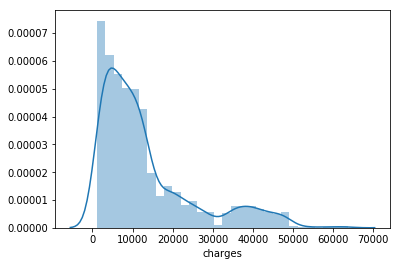

In [8]:
sns.distplot(df["charges"], bins=30)
plt.show()

The 'charges' distribution is right skewed

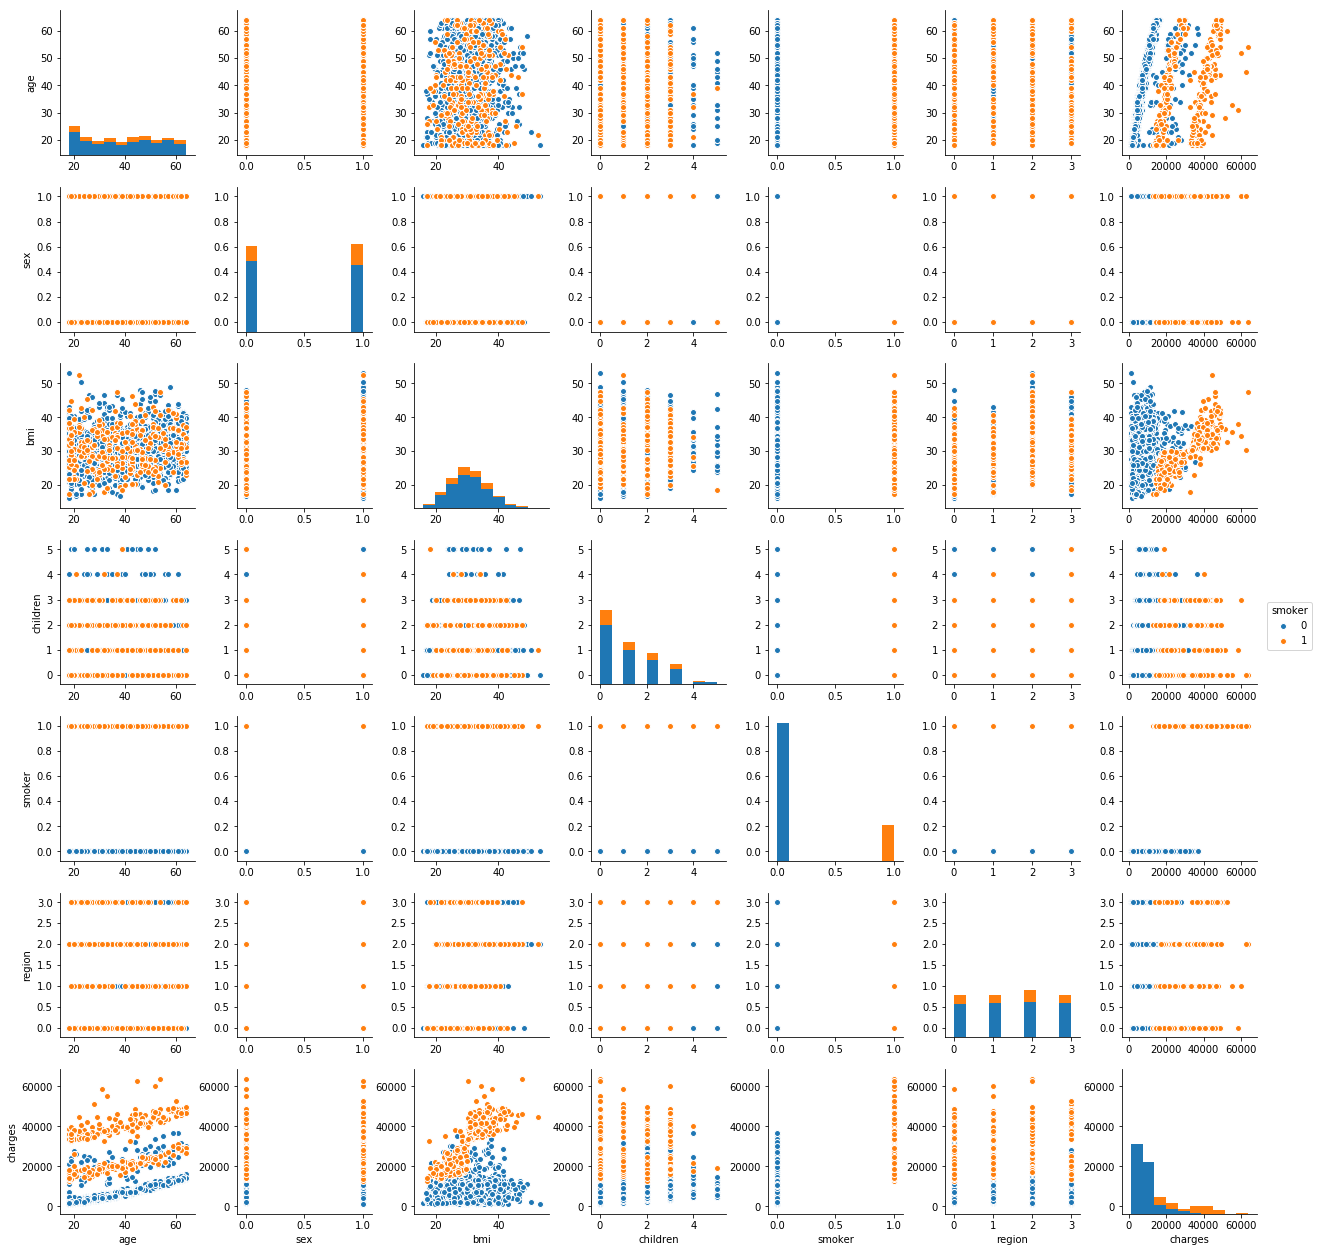

In [9]:
#Plot pairwise relationships in a dataset.
sns.pairplot(df, hue='smoker')

#### Examining relationship between each explanatory variables vs response variable 

/Users/kimchaewon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


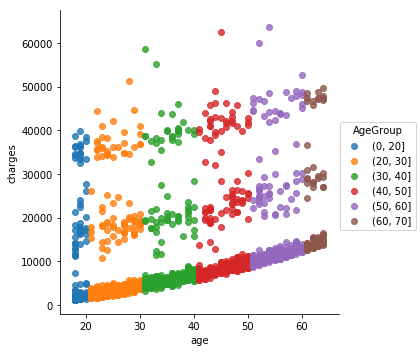

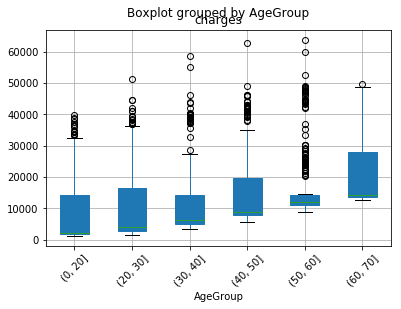

In [10]:
#Age vs Charges
#Create groups for age
bins1=[0,20,30,40,50,60,70]
df['AgeGroup']=pd.cut(df['age'], bins1)
data=pd.value_counts(df['AgeGroup']).sort_index()
sns.lmplot(x="age", y="charges", data=df, fit_reg=False, hue='AgeGroup')
df.boxplot(column='charges', by='AgeGroup',patch_artist=True, rot=45)

/Users/kimchaewon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


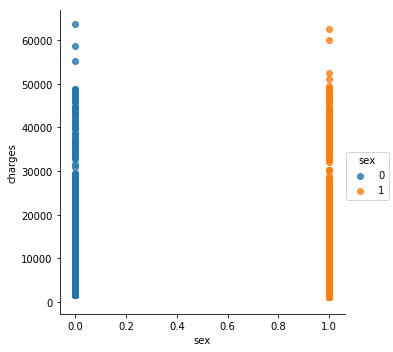

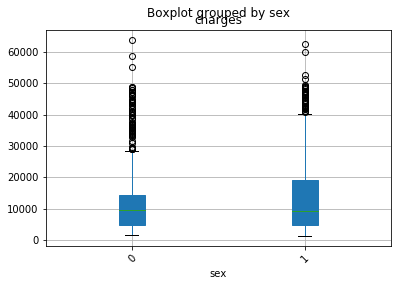

In [11]:
#Sex vs Charges 
#Female = 0 , Male = 1
sns.lmplot( x="sex", y="charges", data=df, fit_reg=False, hue='sex')
df.boxplot(column='charges', by='sex',patch_artist=True, rot=45)

/Users/kimchaewon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


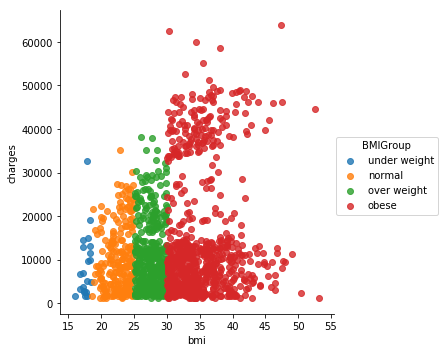

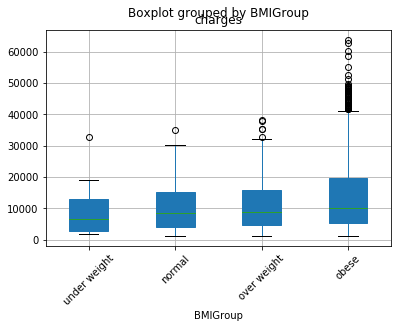

In [12]:
# BMI vs Charges
""" Underweight: Your BMI is less than 18.5
    Healthy weight: Your BMI is 18.5 to 24.9
    Overweight: Your BMI is 25 to 29.9
    Obese: Your BMI is 30 or higher """

#Create groups for BMI
bins2=[0,18.5,25,30,55]
labels=['under weight', 'normal', 'over weight', 'obese']
df['BMIGroup']=pd.cut(df['bmi'], bins=bins2, labels=labels)
sns.lmplot(x="bmi", y="charges", data=df, fit_reg=False, hue='BMIGroup')
df.boxplot(column='charges', by='BMIGroup',patch_artist=True, rot=45)

In [13]:
df.groupby("BMIGroup")['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
BMIGroup,,,,,,,,
under weight,21.0,8657.620652,7591.730101,1621.3402,2775.192150,6640.544850,12829.455100,32734.18630
normal,226.0,10435.440719,7484.434940,1121.8739,4146.836312,8604.153525,15197.264325,35069.37452
over weight,386.0,10997.803881,8067.254166,1252.4070,4593.881375,8659.378000,15751.161360,38245.59327
obese,705.0,15560.926321,14563.057442,1131.5066,5240.765000,9964.060000,19673.335730,63770.42801


People who are obese pay $5000 more in average

/Users/kimchaewon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


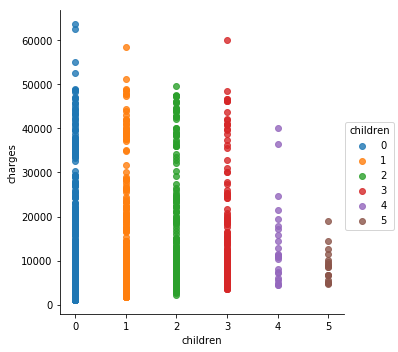

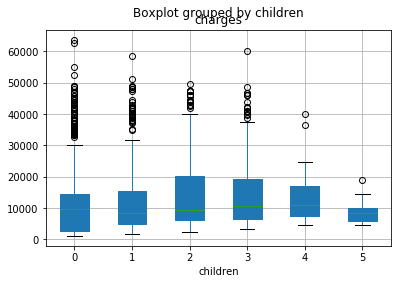

In [14]:
#Children vs Charges
sns.lmplot(x="children", y="charges", data=df, fit_reg=False, hue='children')
df.boxplot(column='charges', by='children',patch_artist=True)

/Users/kimchaewon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


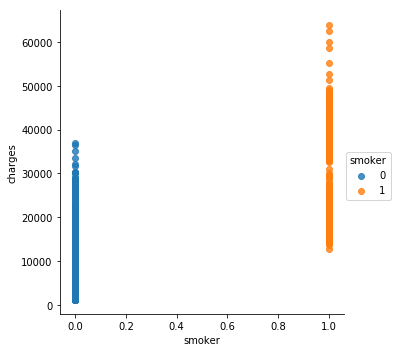

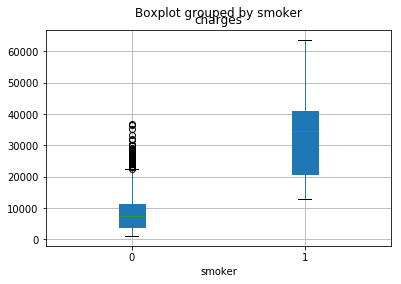

In [15]:
#Smoker vs Charges
#non-smoker = 0, smoker =1
sns.lmplot(x="smoker", y="charges", data=df, fit_reg=False, hue='smoker')
df.boxplot(column='charges', by='smoker',patch_artist=True)

In [16]:
#Single variable Model: charges~smoker
result = sm.ols(formula='df.charges ~ df.smoker', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             df.charges   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2178.
Date:                Tue, 07 Aug 2018   Prob (F-statistic):          8.27e-283
Time:                        14:22:10   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1336   BIC:                         2.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8434.2683    229.014     36.829      0.000    7985.002    8883.535
df.smoker   2.362e+04    506.075     46.665      0.000    2.26e+04    2.46e+04
==============================================================================
Omnibus:                      135.996   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.201
Skew:                           0.727   Prob(JB):                     8.34e-47
Kurtosis:                       4.300   Cond. No.                         2.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/kimchaewon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


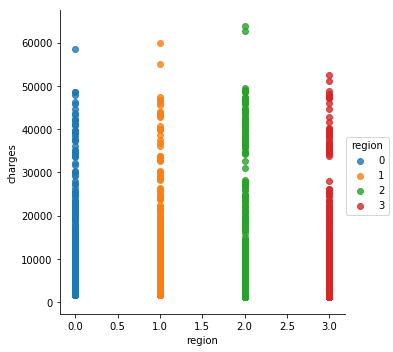

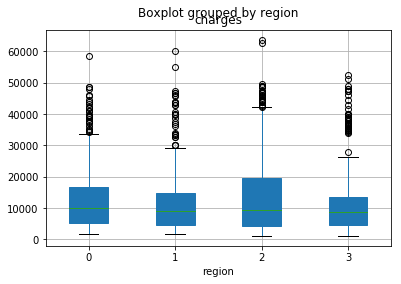

In [17]:
#Region vs Charges
sns.lmplot( x="region", y="charges", data=df, fit_reg=False, hue='region')
df.boxplot(column='charges', by='region',patch_artist=True)

In [18]:
#Correlation between variables
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


We can see that smoker has the highest correlation with charges.smoker(0.7872) > age(0.299)>bmi(0.1983). Another observation is that no variables are highly correlated with each other, thus multicollinearity wouldn’t be a problem. 

#### Regression analysis 

In [19]:
#Full model regression analysis
result_full = sm.ols(formula='df.charges ~ df.age+df.sex+df.bmi+df.children+df.smoker+df.region', data=df).fit()
result_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             df.charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Tue, 07 Aug 2018   Prob (F-statistic):               0.00
Time:                        14:22:11   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.182e+04    955.130    -12.371      0.000   -1.37e+04   -9941.729
df.age        257.2881     11.886     21.647      0.000     233.971     280.605
df.sex       -131.1106    332.811     -0.394      0.694    -784.001     521.780
df.bmi        332.5701     27.722     11.997      0.000     278.186     386.954
df.children   479.3694    137.644      3.483      0.001     209.346     749.393
df.smoker    2.382e+04    411.843     57.839      0.000     2.3e+04    2.46e+04
df.region    -353.6400    151.927     -2.328      0.020    -651.682     -55.598
==============================================================================
Omnibus:                      299.003   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.975
Skew:                           1.207   Prob(JB):                    9.17e-156
Kurtosis:                       5.642   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

First model is a full model that includes all explanatory variables and the adjusted R-squared value is 0.750. This means that 75% of the variation of charges could be explained by the set of explanatory variables we have included. We also observed that sex variables has a p-value greater than 0.05, which means it's not a significant variable so we can eliminate it from our model.

When we examine the coefficients, those who smoke will pay USD 23,823 more than those who don't and for every increase in number of children/dependents medical expenses can increase by USD 479.


In [20]:
#Model with important variables
result2 = sm.ols(formula='df.charges ~ df.smoker+df.age+df.bmi', data=df).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             df.charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Tue, 07 Aug 2018   Prob (F-statistic):               0.00
Time:                        14:22:11   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.168e+04    937.569    -12.454      0.000   -1.35e+04   -9837.561
df.smoker   2.382e+04    412.867     57.703      0.000     2.3e+04    2.46e+04
df.age       259.5475     11.934     21.748      0.000     236.136     282.959
df.bmi       322.6151     27.487     11.737      0.000     268.692     376.538
==============================================================================
Omnibus:                      299.709   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.137
Skew:                           1.213   Prob(JB):                    6.25e-155
Kurtosis:                       5.618   Cond. No.                         289.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#Create 'obese' column derived from BMI>=30
df['obese']=np.where(df['bmi'] >=30, "yes", "no")
lb_obese=LabelEncoder()
df["obese"]=lb_region.fit_transform(df["obese"])
obese_OHE=OneHotEncoder(categorical_features=[9])
df

,age,sex,bmi,children,smoker,region,charges,AgeGroup,BMIGroup,obese
0,19,0,27.900,0,1,3,16884.92400,"(0, 20]",over weight,0
1,18,1,33.770,1,0,2,1725.55230,"(0, 20]",obese,1
2,28,1,33.000,3,0,2,4449.46200,"(20, 30]",obese,1
3,33,1,22.705,0,0,1,21984.47061,"(30, 40]",normal,0
4,32,1,28.880,0,0,1,3866.85520,"(30, 40]",over weight,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,"(40, 50]",obese,1
1334,18,0,31.920,0,0,0,2205.98080,"(0, 20]",obese,1
1335,18,0,36.850,0,0,2,1629.83350,"(0, 20]",obese,1
1336,21,0,25.800,0,0,3,2007.94500,"(20, 30]",over weight,0


In [22]:
#model using derived variable
result3 = sm.ols(formula='df.charges ~ df.obese*df.smoker', data=df).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             df.charges   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1430.
Date:                Tue, 07 Aug 2018   Prob (F-statistic):               0.00
Time:                        14:22:11   Log-Likelihood:                -13515.
No. Observations:                1338   AIC:                         2.704e+04
Df Residuals:                    1334   BIC:                         2.706e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           7977.0295    263.551     30.267      0.000    7460.010    8494.049
df.obese             865.6620    362.633      2.387      0.017     154.269    1577.055
df.smoker           1.339e+04    582.887     22.965      0.000    1.22e+04    1.45e+04
df.obese:df.smoker  1.933e+04    801.420     24.119      0.000    1.78e+04    2.09e+04
==============================================================================
Omnibus:                      363.914   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              947.070
Skew:                           1.427   Prob(JB):                    2.22e-206
Kurtosis:                       5.973   Cond. No.                         7.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#model including derived variable to model 2
result4 = sm.ols(formula='df.charges ~ df.smoker*df.obese+df.age', data=df).fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             df.charges   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     2022.
Date:                Tue, 07 Aug 2018   Prob (F-statistic):               0.00
Time:                        14:22:11   Log-Likelihood:                -13169.
No. Observations:                1338   AIC:                         2.635e+04
Df Residuals:                    1333   BIC:                         2.637e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2189.9336    395.015     -5.544      0.000   -2964.852   -1415.016
df.smoker           1.342e+04    450.311     29.804      0.000    1.25e+04    1.43e+04
df.obese             142.9955    281.183      0.509      0.611    -408.615     694.606
df.smoker:df.obese  1.971e+04    619.263     31.820      0.000    1.85e+04    2.09e+04
df.age               267.8325      8.917     30.036      0.000     250.339     285.326
==============================================================================
Omnibus:                      848.357   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6894.099
Skew:                           2.991   Prob(JB):                         0.00
Kurtosis:                      12.374   Cond. No.                         246.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Prediction

In [24]:
X_pred = df[["smoker","age","bmi"]]
X_pred

,smoker,age,bmi
0,1,19,27.900
1,0,18,33.770
2,0,28,33.000
3,0,33,22.705
4,0,32,28.880
...,...,...,...
1333,0,50,30.970
1334,0,18,31.920
1335,0,18,36.850
1336,0,21,25.800


In [25]:
Y_ols_pred = result2.predict(X_pred)
Y_ols_pred

0       26079.218615
1        3889.737458
2        6236.798721
3        4213.213387
4        5945.814340
            ...     
1333    11291.934816
1334     3292.899462
1335     4883.392067
1336     2097.137324
1337    37357.672966
Length: 1338, dtype: float64

Text(0.5,0,'Predicted value of charges')

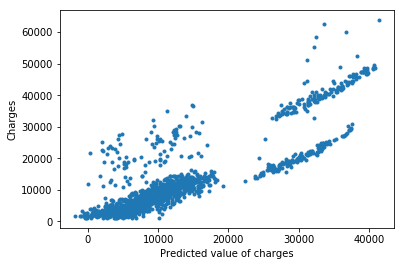

In [26]:
#Real vs predicted values plot
plt.plot(Y_ols_pred, df.charges, 'o', label='Original data', markersize=3)
plt.ylabel('Charges')
plt.xlabel('Predicted value of charges')

Multiple regression methods generally depend on the following four assumptions:
1. the residuals of the model are nearly normal,
2. the variability of the residuals is nearly constant, 
3. the residuals are independent, and
4. each variable is linearly related to the outcome.

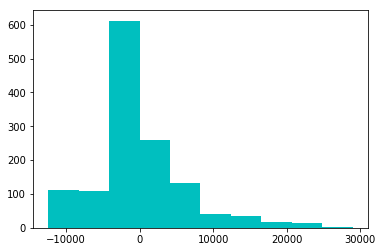

In [27]:
#Residual distribution 
Residual= df.charges - Y_ols_pred
plt.hist(Residual,bins=10,color='c')
plt.show()

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([-12415.4318125 , -11737.01136201, -11481.54398796, ...,
          23915.76740028,  26088.22468703,  28971.78646766])),
 (5792.6424611541825, 1.3741129972462999e-10, 0.95018615349065505))

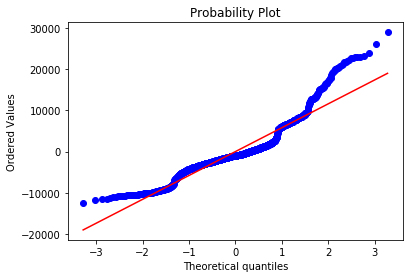

In [28]:
scipy.stats.probplot(Residual, sparams=(), dist='norm', fit=True, plot=plt)

Text(0.5,0,'Fitted Values')

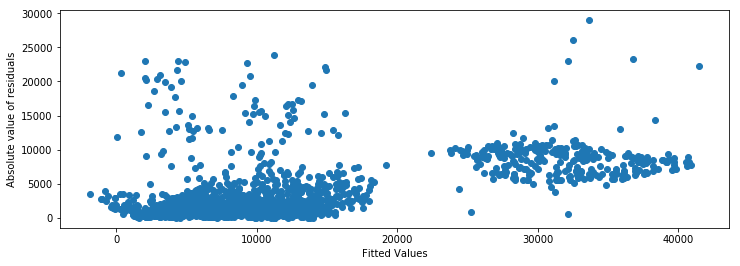

In [29]:
plt.figure(figsize=(12,4))
plt.scatter(Y_ols_pred, abs(Residual))
plt.ylabel('Absolute value of residuals')
plt.xlabel('Fitted Values')

#### Testing model to predict medical expenses with new data

In [37]:
def predict_cost(smoker, age, bmi):
    y = (result2.params[0]+(smoker*result2.params[1]) + (age*result2.params[2]) + (bmi*result2.params[3]))
    print("The predicted medical expenses for this person is:", '${:,.2f}'.format(y))


#Person A: Smoker, 56 years old, bmi=26
predict_cost(1,56,26)
#Person B: Non-smoker, 55 years old, bmi = 23
predict_cost(0,55,23)
#Person C: Non-smoker, 30 years old, bmi = 33
predict_cost(0, 30,33)
#Person D: Non-smoker, 32 years old, bmi = 21
predict_cost(0,32,21)


The predicted medical expenses for this person is: $35,069.51
The predicted medical expenses for this person is: $10,018.43
The predicted medical expenses for this person is: $6,755.89
The predicted medical expenses for this person is: $3,403.61


### THE END! 

sklearn 70% to train and 30% test 